In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans 
import scipy.cluster.hierarchy as sch
import scipy

In [2]:
data=pd.read_csv('bank.csv')

In [3]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
data.describe(include="all")

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [6]:
# Are there any duplicates ?
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [7]:
data.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
data.shape

(210, 7)

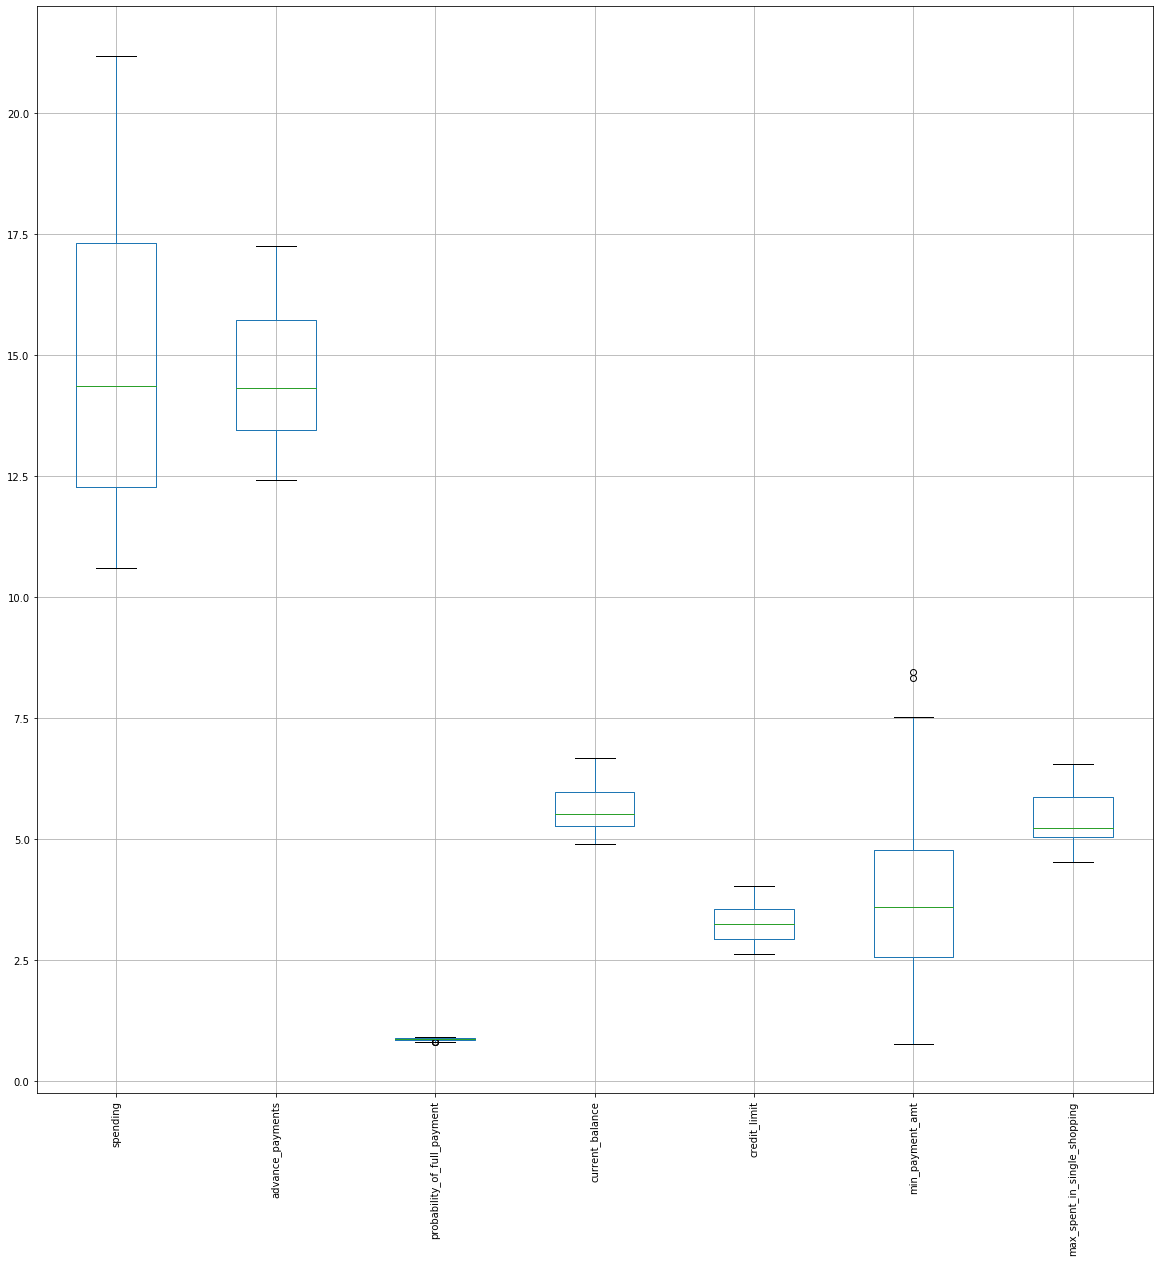

In [9]:
data.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

## Univariate & Multivariate Analysis

In [10]:
def univariateAnalysis_numeric(column,nbins):
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    #sns.distplot(data[column], kde=False, color='g',hist=True);
    sns.distplot(data[column], bins = 50, hist_kws= dict(ec ='black'),kde=False)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    plt.show()

In [11]:
lstnumericcolumns = list(data.columns.values)
len(lstnumericcolumns)

7

Distribution of spending
----------------------------------------------------------------------------


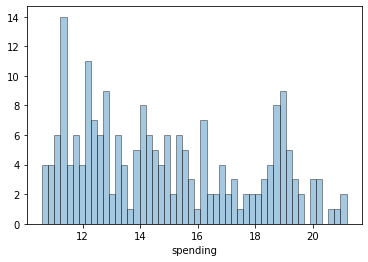

BoxPlot of spending
----------------------------------------------------------------------------


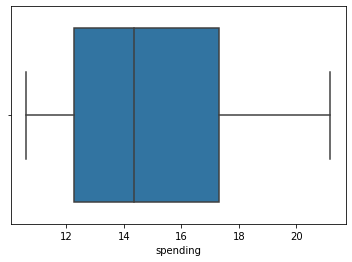

Distribution of advance_payments
----------------------------------------------------------------------------


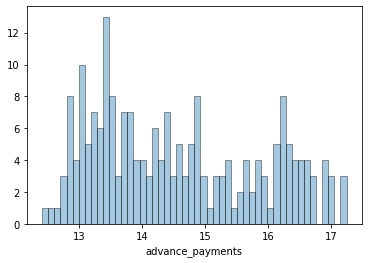

BoxPlot of advance_payments
----------------------------------------------------------------------------


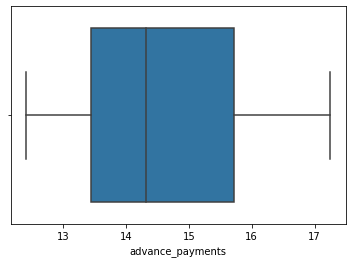

Distribution of probability_of_full_payment
----------------------------------------------------------------------------


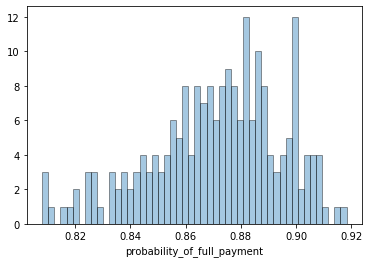

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


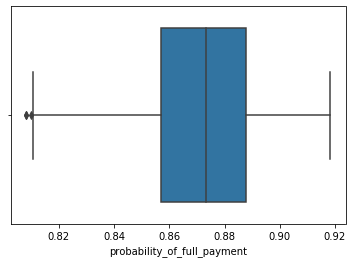

Distribution of current_balance
----------------------------------------------------------------------------


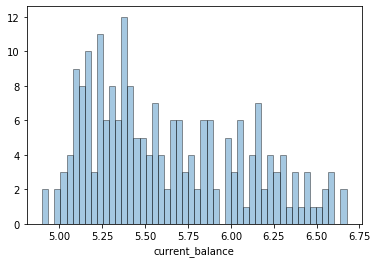

BoxPlot of current_balance
----------------------------------------------------------------------------


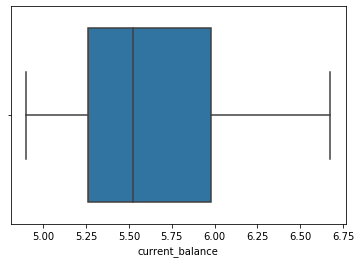

Distribution of credit_limit
----------------------------------------------------------------------------


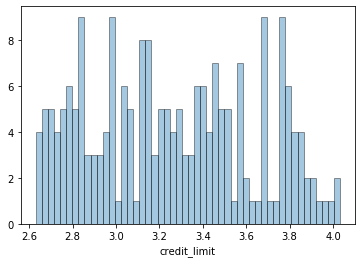

BoxPlot of credit_limit
----------------------------------------------------------------------------


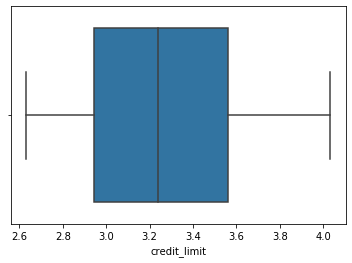

Distribution of min_payment_amt
----------------------------------------------------------------------------


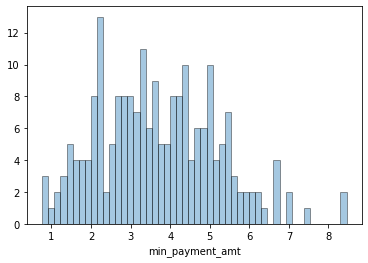

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


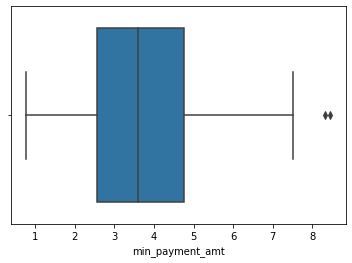

Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


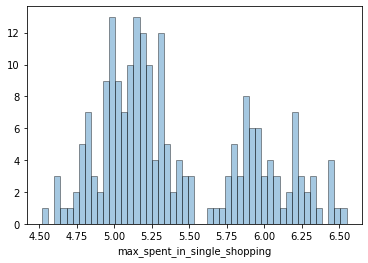

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


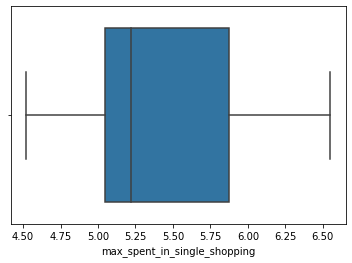

In [12]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

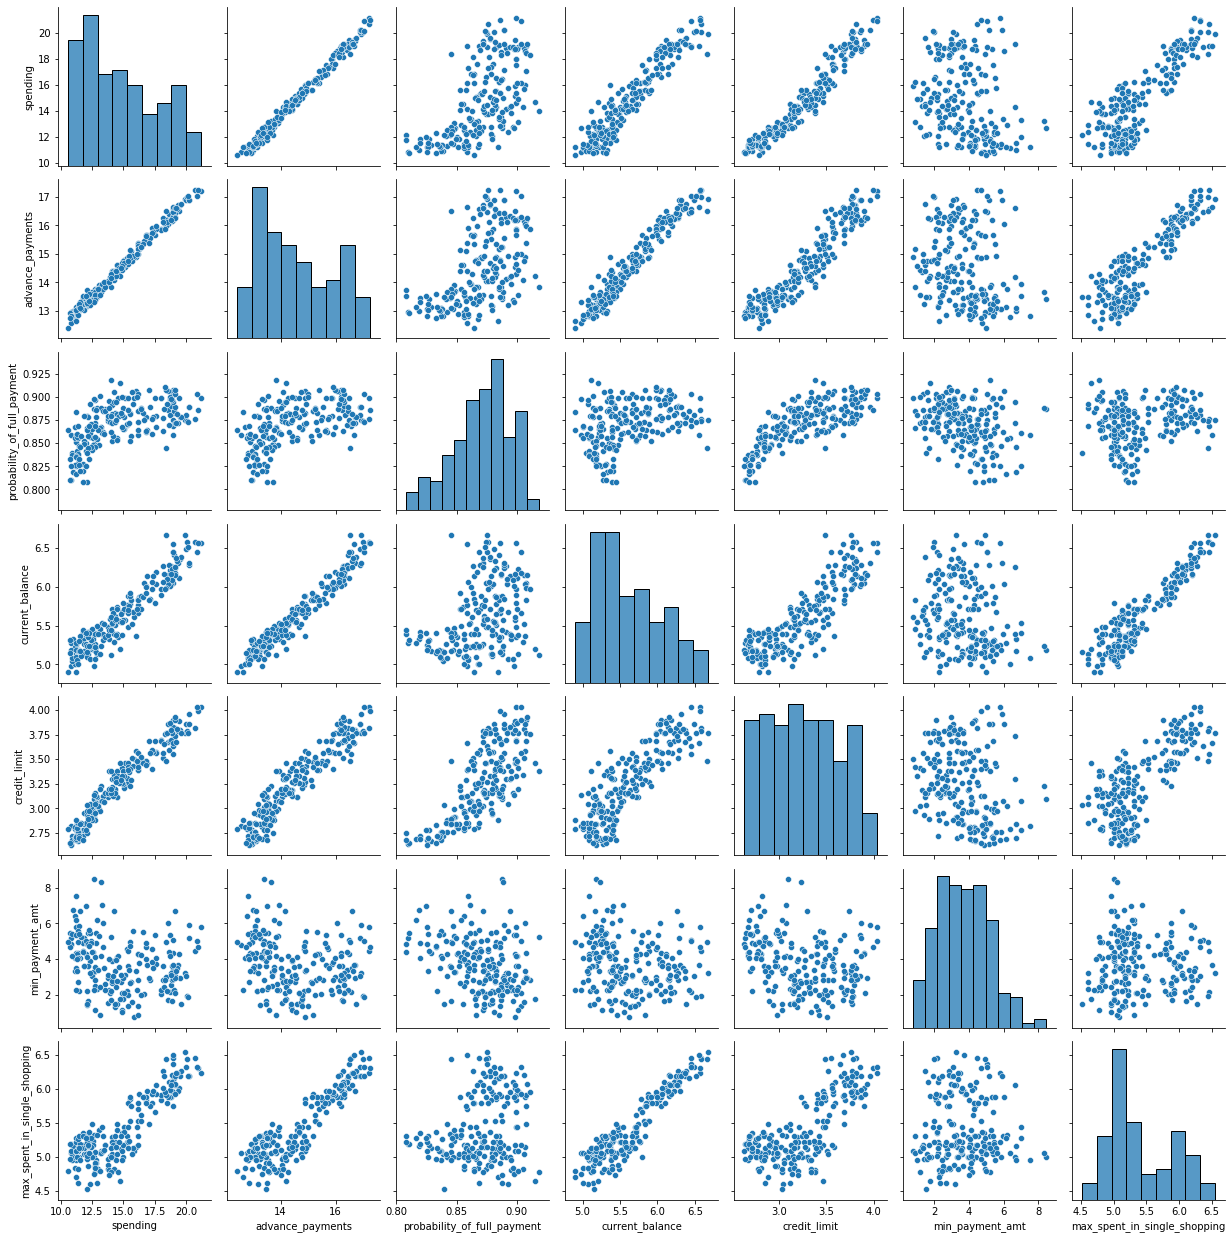

In [16]:
sns.pairplot(data)
plt.show()

In [13]:
data.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


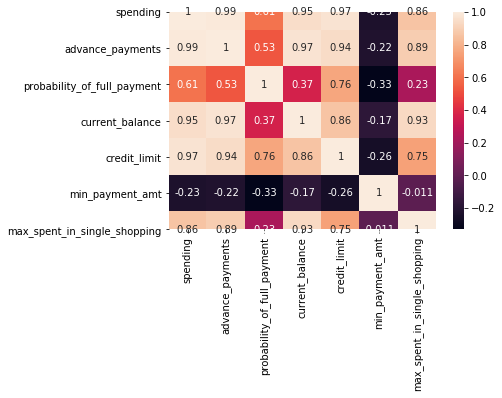

In [14]:
sns.heatmap(data.corr(),annot=True);

## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X = StandardScaler()

In [17]:
scaled_df = pd.DataFrame(X.fit_transform(data),columns=data.columns)

In [18]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
link_method = linkage(scaled_df, method = 'average')

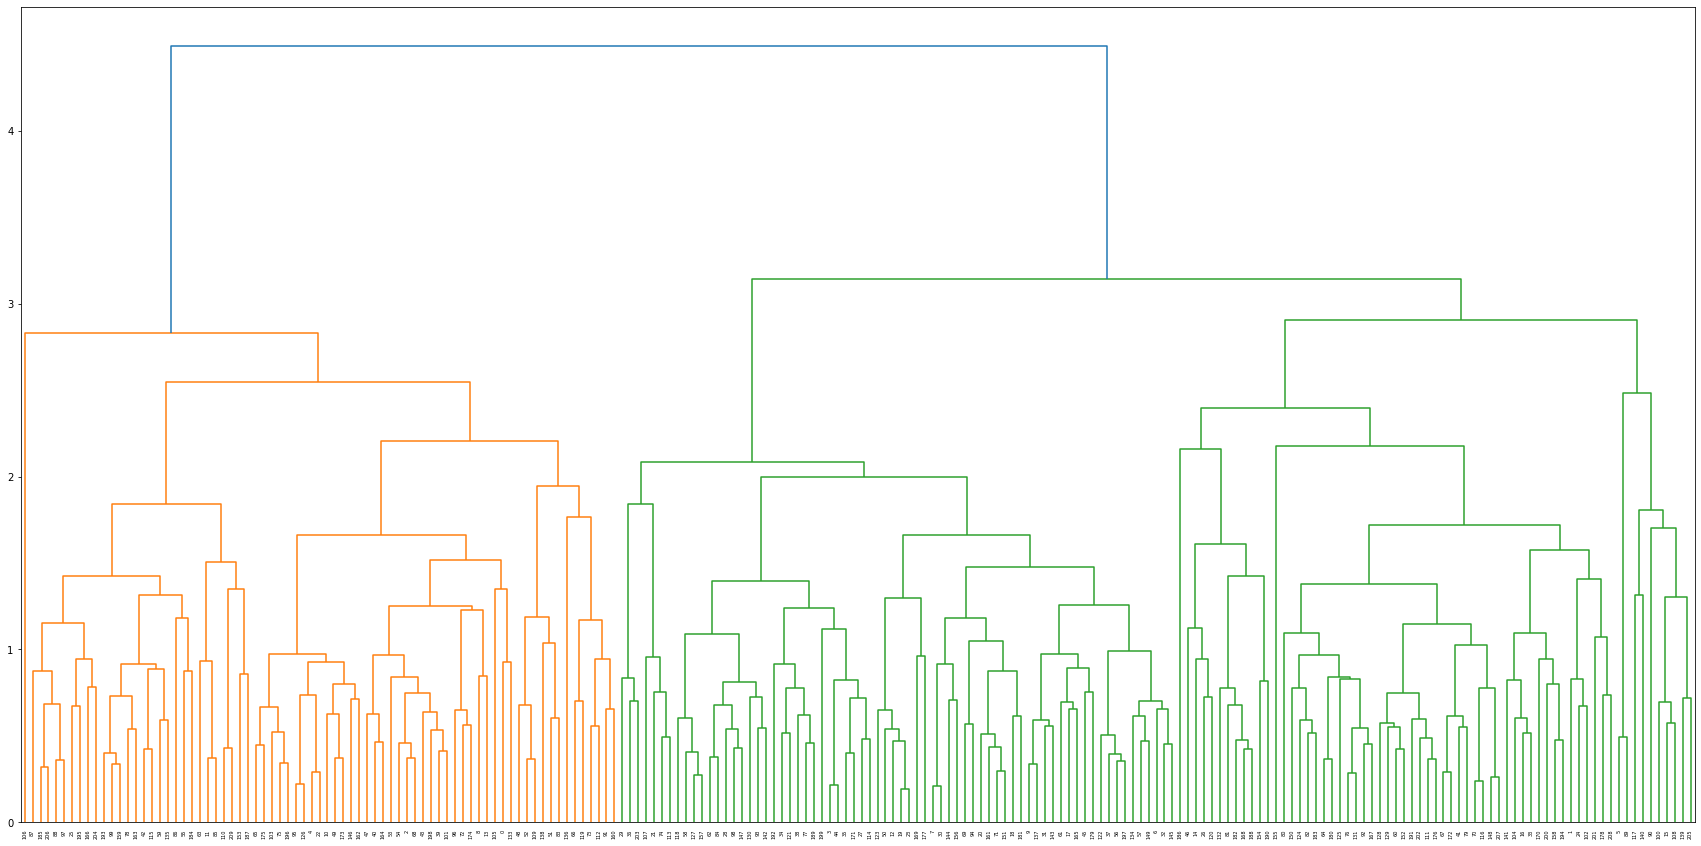

In [21]:
plt.figure(figsize=(30,15))
dend=dendrogram(link_method)

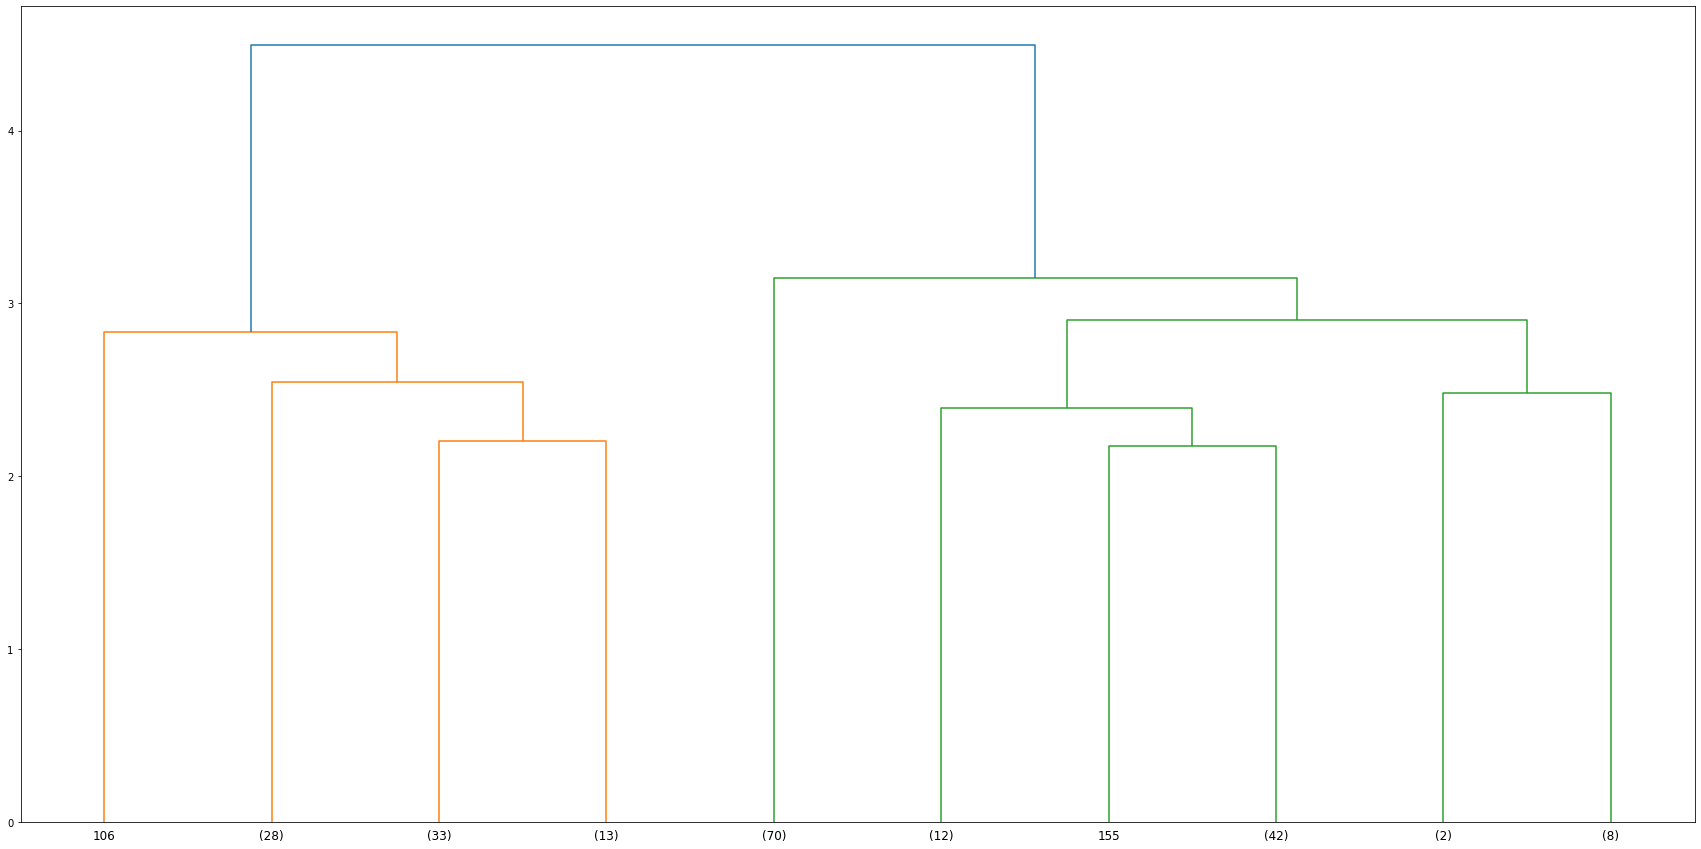

In [22]:
plt.figure(figsize=(30,15))
dend=dendrogram(link_method,truncate_mode='lastp',p=10)

In [23]:
link_methodward = linkage(scaled_df, method = 'ward')

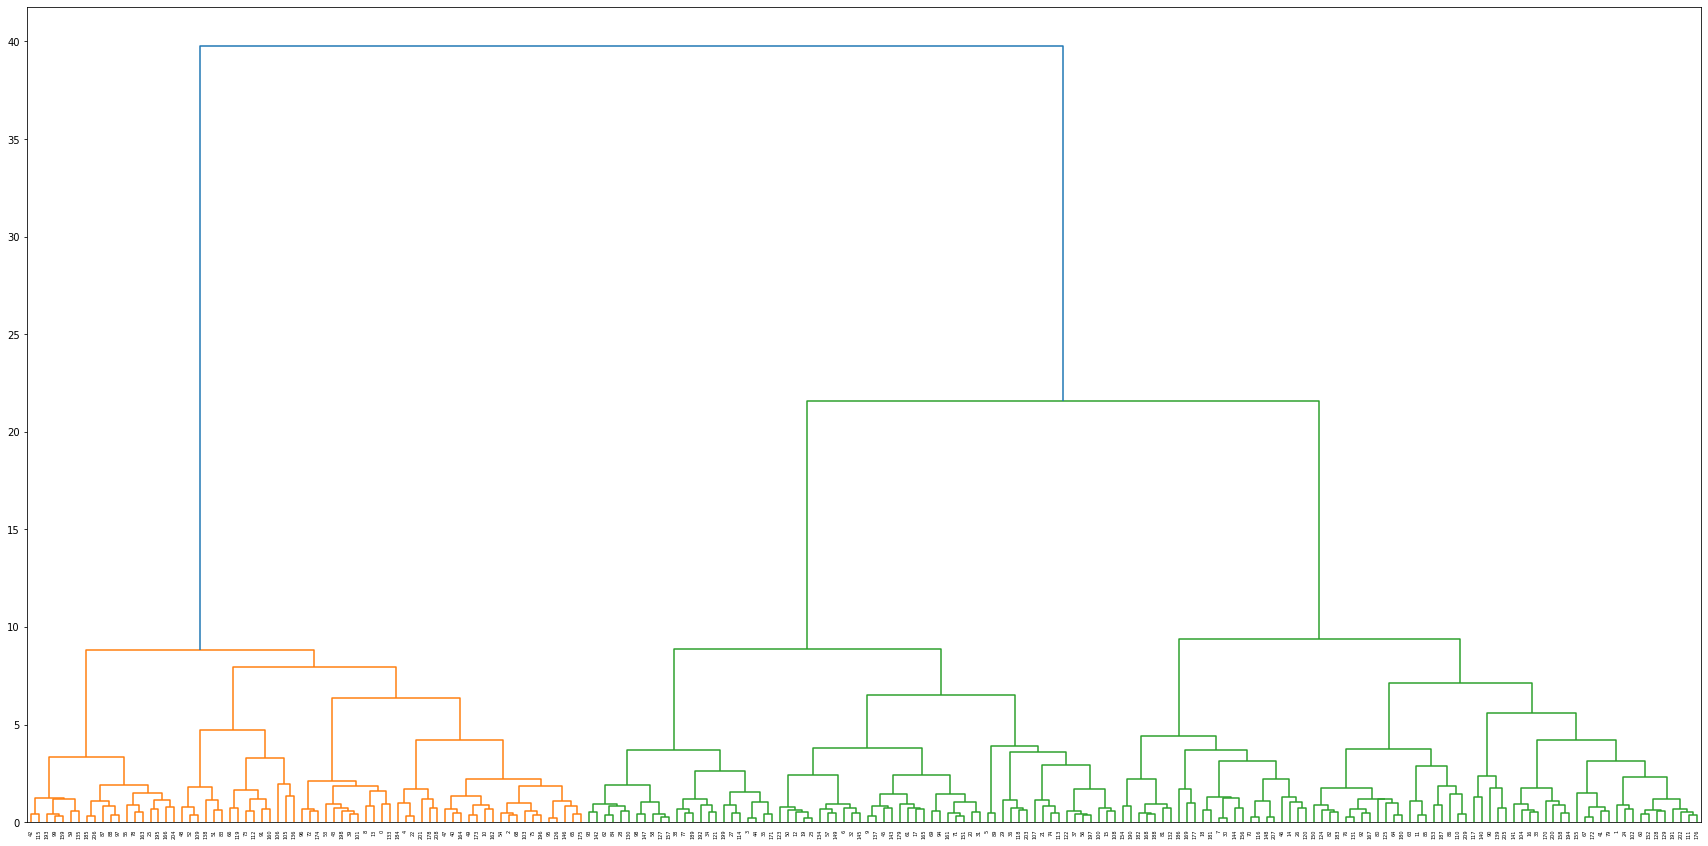

In [24]:
plt.figure(figsize=(30,15))
dend_ward=dendrogram(link_methodward)

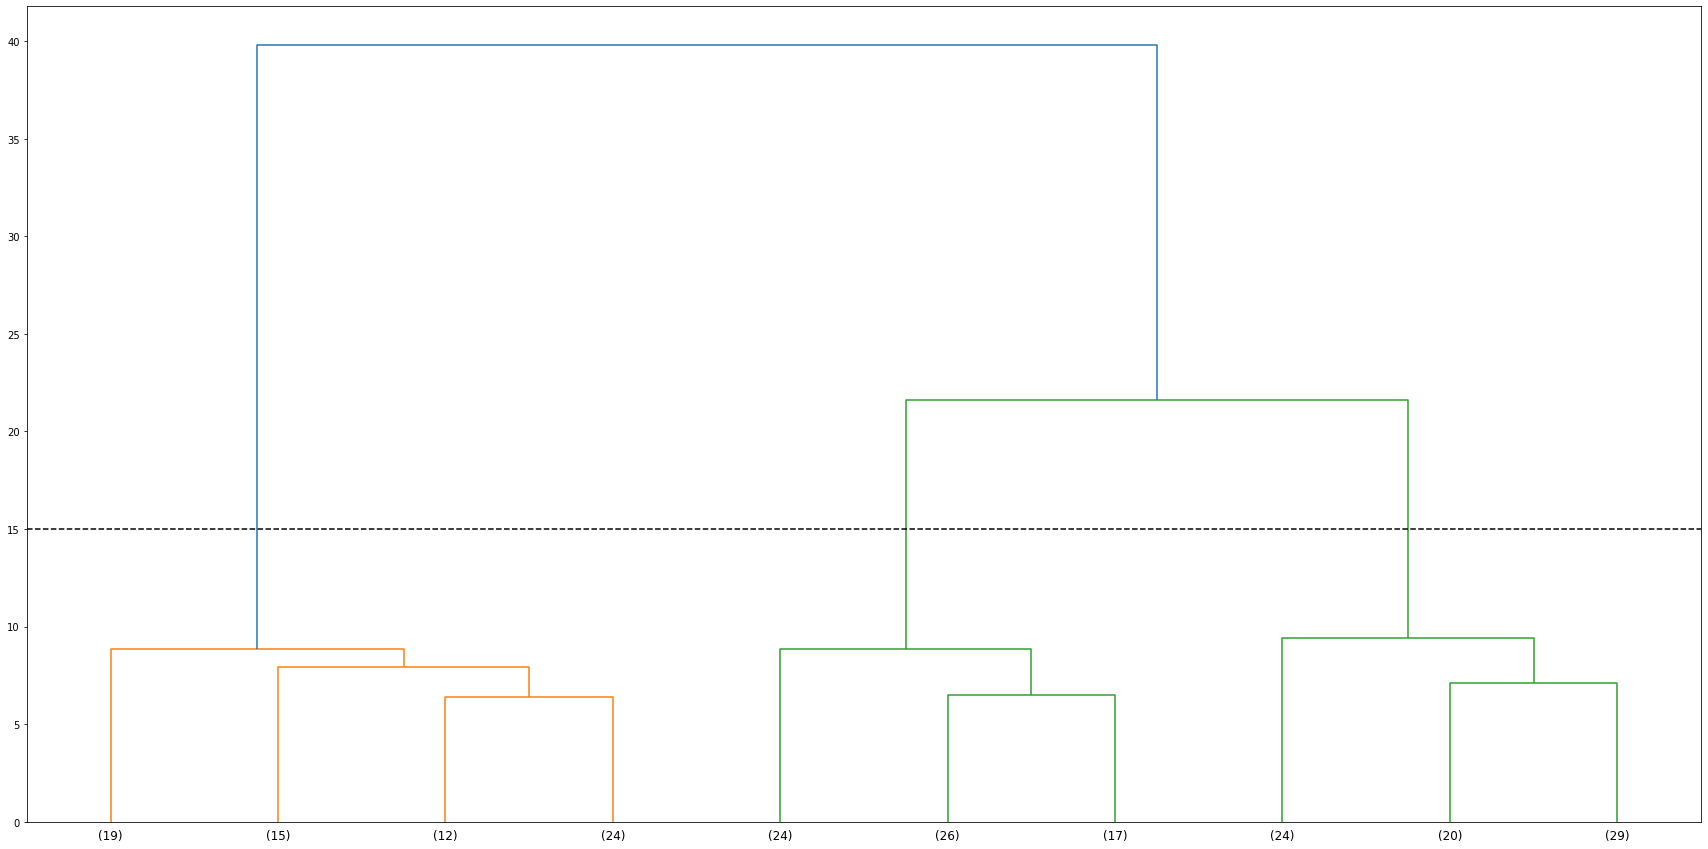

In [25]:
plt.figure(figsize=(30,15))
dend_ward=dendrogram(link_methodward,truncate_mode='lastp',p=10)
plt.axhline(y = 15 , color = 'black', linestyle = '--');

In [79]:
from scipy.cluster.hierarchy import fcluster

In [80]:
clusters = fcluster(link_methodward,3,criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [81]:
data['clusters']= clusters

In [82]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,K_means_clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.362276


In [83]:
data.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [84]:
aggdata=data.groupby('clusters').mean()
aggdata['Freq']=data.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_means_clusters,sil_width,Freq
clusters,,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.057143,0.451629,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,0.029851,0.419314,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,1.821918,0.334857,73


## KMeans Clustering

In [85]:
from sklearn.cluster import KMeans

In [86]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2)

In [87]:
k_means.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [89]:
k_means.inertia_

659.1717544870407

In [90]:
wss =[] 

In [91]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [92]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.2935481943965,
 326.5136953844314,
 289.46717056412876,
 263.68315936206375,
 240.0735661512592,
 224.0918627642958,
 211.738678471592]

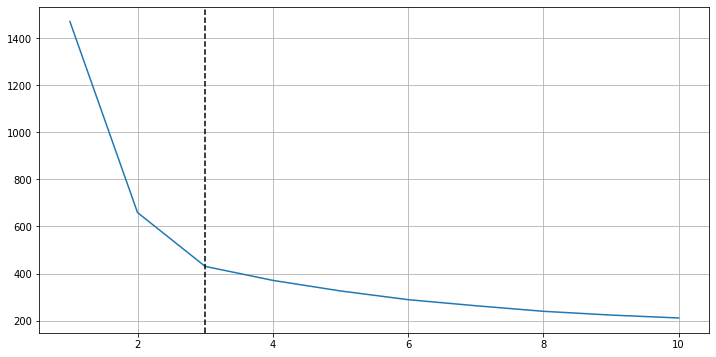

In [93]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wss)
plt.axvline(x=3,linestyle= '--', color='black');

In [94]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [95]:
X,Y = make_blobs()

In [96]:
no_of_clusters =[2,3,4,5,6]

for n_clusters in no_of_clusters:
    cluster= KMeans(n_clusters=n_clusters)
    cluster_labels = cluster.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    (print("for cluster n =" ,n_clusters,'Avg silhouette score',silhouette_avg))

for cluster n = 2 Avg silhouette score 0.7110924632595289
for cluster n = 3 Avg silhouette score 0.8433868817137713
for cluster n = 4 Avg silhouette score 0.7120874982043222
for cluster n = 5 Avg silhouette score 0.612126010722077
for cluster n = 6 Avg silhouette score 0.4298855857074467


In [97]:
Sil=[0.699,0.77,0.65,0.53,0.38]

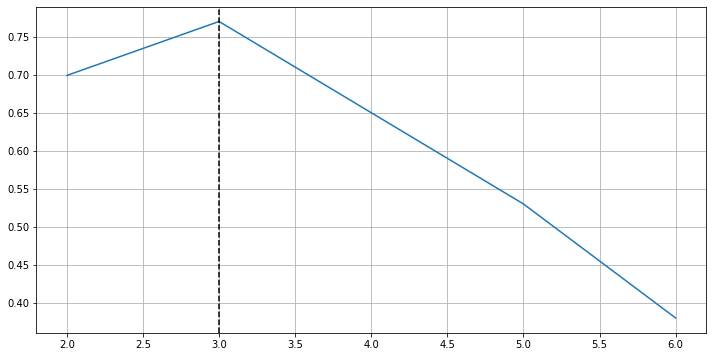

In [98]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(no_of_clusters,Sil)
plt.axvline(x=3,linestyle= '--', color='black');

In [99]:
KM= KMeans(n_clusters=3)
KM.fit(scaled_df)
labels=KM.labels_

In [100]:
data['K_means_clusters'] = labels
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,K_means_clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.362276


In [101]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [102]:
silhouette_score(scaled_df,labels)

0.4007270552751299

In [103]:
sil_width= silhouette_samples(scaled_df, labels)
silhouette_samples(scaled_df , labels).min()

0.002713089347678533

In [104]:
data['sil_width'] = sil_width
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,K_means_clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.362276


In [105]:
data.K_means_clusters.value_counts().sort_index()

0    72
1    67
2    71
Name: K_means_clusters, dtype: int64

In [118]:
aggdata1=data.groupby('K_means_clusters').mean()
aggdata1['Freq']=data.K_means_clusters.value_counts().sort_index()
aggdata1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width,Freq
K_means_clusters,,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.397473,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468772,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.339816,71


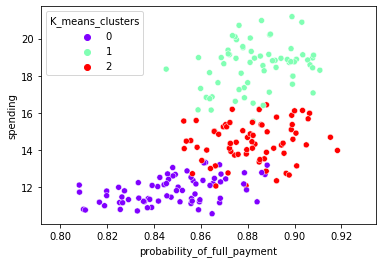

In [107]:
sns.scatterplot(x = 'probability_of_full_payment' ,y = 'spending', hue = 'K_means_clusters', palette= 'rainbow' , data = data);

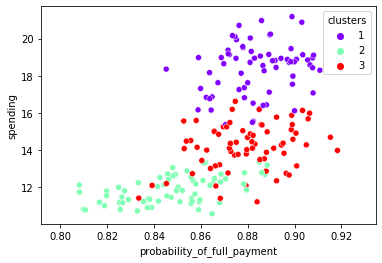

In [108]:
sns.scatterplot(x = 'probability_of_full_payment' ,y = 'spending', hue = 'clusters', palette= 'rainbow' , data = data);